In [ ]:
# Install the pacakge if it hasn't been installed
%pip install pot

# Figure 1

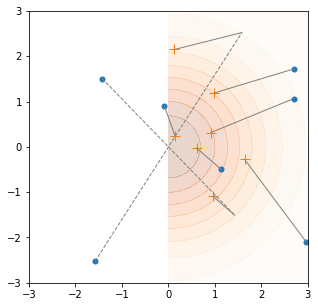

In [1]:
import numpy as np
import ot
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from scipy.stats import kde

# X, H: ndarray n by p
# Symmetry: Central, Sign, or Spherical
# Return the Wilcoxon_signed_rank statistic
n, p = 7, 2
np.random.seed(13)
X = np.random.normal(loc=0.0, scale=2.0, size=(n, p))
H = np.random.normal(loc=0.0, scale=1.0, size=(n, p))
H[:,0] = abs(H[:,0])

# define the cost function
def c_metric(x, h):
    return (-abs(np.inner(x, h)))

def S(x, h):
    return (np.sign(np.inner(x, h)))

# loss matrix
M = pairwise_distances(X, H, metric=c_metric, n_jobs=None)
# Compute EMD
G0 = ot.emd(np.ones((n,)), np.ones((n,)), M)

plt.figure(figsize=(5, 5))
A = 3
plt.xlim([-A, A])
plt.ylim([-A, A])
plt.plot(X[:,0], X[:,1], ".", markersize=10)
plt.plot(H[:,0], H[:,1], "+", markersize=10)

for i in range(n):
    if S(X[i,], H[next((i for i, x in enumerate(G0[i,]) if x > 0), None),]) > 0:
        x1, y1 = X[i,]
        x2, y2 = H[next((i for i, x in enumerate(G0[i,]) if x > 0), None),]
        plt.plot([x1,x2],[y1,y2],linewidth=1, color="gray")
    if S(X[i,], H[next((i for i, x in enumerate(G0[i,]) if x > 0), None),]) <= 0:
        x1, y1 = X[i,]
        x2, y2 = H[next((i for i, x in enumerate(G0[i,]) if x > 0), None),]
        plt.plot([x1,-x1],[y1,-y1],linewidth=1, color="gray",linestyle='dashed')
        plt.plot([-x1,x2],[-y1,y2],linewidth=1, color="gray")

N = 250
x = np.linspace(0, 3.5, N)
y = np.linspace(-3.5, 3.5, 2*N)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-(X**2+Y**2)/4)
z = Z1
levels = np.linspace(z.min(), z.max(), 10)
plt.contourf(X, Y, z,levels=levels,cmap=plt.cm.Oranges,alpha=0.2)
#plt.savefig("/Users/huangzhen/desktop/ot_vis.pdf")
plt.show()

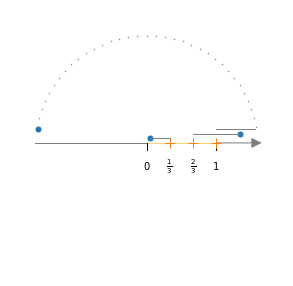

In [2]:
import numpy as np
import matplotlib.pyplot as plt
n = 3
np.random.seed(23)
X = np.zeros((n,2))
X[:,0] = np.random.normal(loc=0.0, scale=2.0, size=n)
H = np.zeros((n,2))
H[:,0] = np.arange(1,n+1)/n

plt.figure(figsize=(5, 5))
A = 2
plt.xlim([-A, A])
plt.ylim([-A, A])
plt.axis('off')
plt.arrow(1, 0, 0.5, 0, width=.015, head_width=0.15, head_length=0.15, facecolor='black', alpha=0.5,edgecolor='none')
plt.plot([0,1],[0,0],color='orange',linewidth=1,alpha=0.5)
plt.plot([-1.6,0],[0,0],color='black',linewidth=1,alpha=0.5)

plt.plot([0,0],[0,-0.1],color='black',linewidth=1)
plt.plot([1,1],[0,-0.1],color='black',linewidth=1)
plt.text(-0.05, -0.4, "0")
plt.text(1-0.05, -0.4, "1")
plt.text(1/3-0.05, -0.4, r'$\frac{1}{3}$')
plt.text(2/3-0.05, -0.4, r'$\frac{2}{3}$')
X[:,0] = (X[:,0])[np.argsort(abs(X[:,0]))]
plt.plot(X[:,0], X[:,1] + np.arange(1,3+1)/15, ".", markersize=10)
plt.plot(H[:,0], H[:,1], "+", markersize=10)
for i in range(n):
    x1, y1 = X[i,]
    x2, y2 = H[i,]
    if X[i,0] > 0:
        plt.plot([x1,x2],[(i+1)/15,(i+1)/15],linewidth=1, color="gray")
    if X[i,0] < 0:
        thetas = np.linspace(0.15,np.pi-0.15,35)
        r1 = abs(x1)+0.025
        plt.plot(r1*np.cos(thetas),r1*np.sin(thetas), ".",markersize=1,color="gray")
        plt.plot([-x1,x2],[(i+1)/15,(i+1)/15],linewidth=1, color="gray")
#plt.savefig("/Users/huangzhen/desktop/one_dim.pdf")
plt.show()

# Figure 2

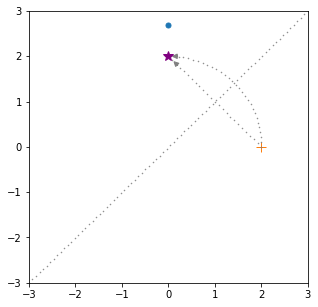

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5, 5))
A = 3
plt.xlim([-A, A])
plt.ylim([-A, A])
np.random.seed(1)
theta1, r1 = np.pi/2, 2.7
plt.plot(r1*np.cos(theta1), r1*np.sin(theta1), ".", markersize=10)
r2 = 2
plt.plot(r2, 0, "+", markersize=10)
thetas = np.linspace(0,theta1,30)
plt.plot(r2*np.cos(thetas),r2*np.sin(thetas), ".",markersize=1,color="gray")
t = np.linspace(-3,3,80)
plt.plot(t,t, ".",markersize=1,color="gray")
t = np.linspace(0,2,25)
plt.plot(t,2-t, ".",markersize=1,color="gray")
plt.arrow(0.2, 1.8, -0.01, 0.01, width=.001, head_width=0.1, head_length=0.1, color='gray', alpha=1)
plt.arrow(0.2, 2, -0.01, 0, width=.001, head_width=0.1, head_length=0.1, color='gray', alpha=1)
plt.plot(0,2,"*", markersize=10,color="purple")
#plt.savefig("/Users/huangzhen/desktop/signed_rank.pdf")
plt.show()

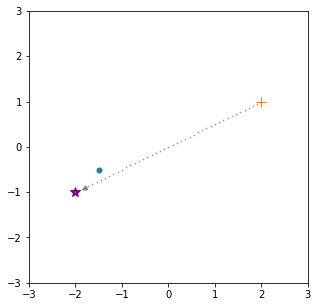

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5, 5))
A = 3
plt.xlim([-A, A])
plt.ylim([-A, A])
plt.plot(-1.5, -0.5, ".", markersize=10)
plt.plot(2, 1, "+", markersize=10)
plt.plot(-2,-1,"*", markersize=10,color="purple")
t = np.linspace(-2,2,45)
plt.plot(t,t/2, ".",markersize=1,color="gray")
plt.arrow(-1.75, -0.9, -0.01, -0.005, width=.01, head_width=0.1, head_length=0.1, color='gray', alpha=1)
#plt.savefig("/Users/huangzhen/desktop/signed_rank_cen.pdf")
plt.show()

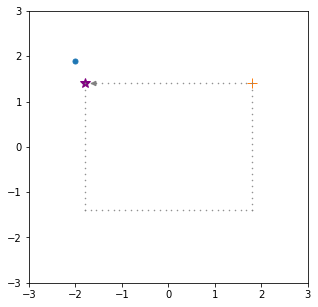

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5, 5))
A = 3
plt.xlim([-A, A])
plt.ylim([-A, A])
plt.plot(-2, 1.9, ".", markersize=10)
plt.plot(1.8, 1.4, "+", markersize=10)
plt.plot(-1.8, 1.4,"*", markersize=10,color="purple")
t = np.linspace(-1.8,1.8,30)
plt.plot(t,[1.4]*len(t), ".",markersize=1,color="gray")
plt.plot(t,[-1.4]*len(t), ".",markersize=1,color="gray")
t = np.linspace(-1.4,1.4,int(30*1.4/1.8)-1)
plt.plot([-1.8]*len(t),t, ".",markersize=1,color="gray")
plt.plot([1.8]*len(t),t, ".",markersize=1,color="gray")
plt.arrow(-1.55, 1.4, -0.01, 0, width=.01, head_width=0.1, head_length=0.1, color='gray', alpha=1)
#plt.savefig("/Users/huangzhen/desktop/signed_rank_sign.pdf")
plt.show()

# Figure 3

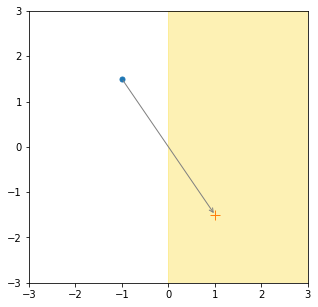

In [6]:
plt.figure(figsize=(5, 5))
A = 3
plt.xlim([-A, A])
plt.ylim([-A, A])
plt.axvspan(0, 3, ymin = 0, ymax = 1, color='#F9D307', alpha=0.3)
plt.plot(-1, 1.5, ".", markersize=10)
plt.plot(1, -1.5, "+", markersize=10)
plt.annotate(text='', xy=(1,-1.5), xytext=(-1,1.5), arrowprops=dict(arrowstyle='->',color='grey'))
#plt.savefig("/Users/huangzhen/desktop/q_cen.pdf")
plt.show()

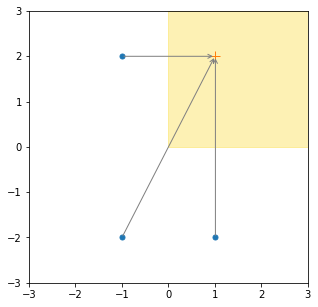

In [7]:
plt.figure(figsize=(5, 5))
A = 3
plt.xlim([-A, A])
plt.ylim([-A, A])
plt.axvspan(0, 3, ymin = 0.5, ymax = 1, color='#F9D307', alpha=0.3)
plt.plot([-1,-1,1], [-2,2,-2], ".", markersize=10)
plt.plot(1, 2, "+", markersize=10)
plt.annotate(text='', xy=(1,2), xytext=(-1,2), arrowprops=dict(arrowstyle='->',color='grey'))
plt.annotate(text='', xy=(1.01,2), xytext=(1.01,-2), arrowprops=dict(arrowstyle='->',color='grey'))
plt.annotate(text='', xy=(1,2), xytext=(-1,-2), arrowprops=dict(arrowstyle='->',color='grey'))
#plt.savefig("/Users/huangzhen/desktop/q_sign.pdf")
plt.show()

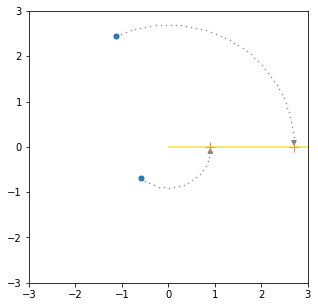

In [8]:
plt.figure(figsize=(5, 5))
A = 3
plt.xlim([-A, A])
plt.ylim([-A, A])
np.random.seed(1)
theta1, r1 = 2, 2.7
theta2, r2 = 4, 0.9
plt.plot([r1*np.cos(theta1),r2*np.cos(theta2)], [r1*np.sin(theta1),r2*np.sin(theta2)], ".", markersize=10)
plt.plot([r2,r1], [0,0], "+", markersize=10)
thetas = np.linspace(0,theta1,50)
plt.plot(r1*np.cos(thetas),r1*np.sin(thetas), ".",markersize=1,color="gray")
thetas = np.linspace(theta2,2*np.pi,20)
plt.plot(r2*np.cos(thetas),r2*np.sin(thetas), ".",markersize=1,color="gray")
plt.arrow(2.7, 0.15, 0, -0.01, width=.001, head_width=0.1, head_length=0.1, color='gray', alpha=1)
plt.arrow(0.9, -0.15, 0, 0.01, width=.001, head_width=0.1, head_length=0.1, color='gray', alpha=1)
plt.plot([0.02,3],[0,0],color='#F9D307',alpha=0.75)
#plt.savefig("/Users/huangzhen/desktop/q_sph.pdf")
plt.show()

# Figure 4

In [1]:
import numpy as np
import ot
from sklearn.metrics import pairwise_distances
from math import pi
import multiprocess as mp
from scipy.stats import chi2
from scipy.stats import f
from scipy.stats import ortho_group
from scipy.stats import binom
from scipy.stats import halfnorm
from scipy.stats import norm
from datetime import datetime
NUM_CORE = 7
iter = 1000

# X, H: ndarray n by p
# Symmetry: Central, Sign, or Spherical
# Return the Wilcoxon_signed_rank statistic
def Wilcoxon_signed_rank(X, H, Symmetry="Central"):
    n, p = X.shape

    # define the cost function
    if Symmetry == "Central":
        def c_metric(x, h):
            return (-abs(np.inner(x, h)))

        def S(x, h):
            return (np.sign(np.inner(x, h)))

    if Symmetry == "Sign":
        def c_metric(x, h):
            return (-np.inner(abs(x), abs(h)))

        def S(x, h):
            return (np.sign(x * h))


    if Symmetry == "Spherical":
        x_norm = [np.linalg.norm(X[i,]) for i in range(n)]
        seq = sorted(x_norm)
        x_rank = [seq.index(v) for v in x_norm]
        h_norm = [np.linalg.norm(H[i,]) for i in range(n)]
        sorted_h = sorted(h_norm)
        W = sum([X[i,] * (sorted_h[x_rank[i]]/x_norm[i]) for i in range(n)])/np.sqrt(n)
        return (W)

    # loss matrix
    M = pairwise_distances(X, H, metric=c_metric, n_jobs=None)

    # Compute EMD
    G0 = ot.emd(np.ones((n,)), np.ones((n,)), M)

    W = sum([S(X[i,], H[next((i for i, x in enumerate(G0[i,]) if x > 0), None),]) * H[
        next((i for i, x in enumerate(G0[i,]) if x > 0), None),] for i in range(n)]) / np.sqrt(n)

    return (W)


def gram_schmidt(A):
    (n, m) = A.shape
    
    for i in range(m):
        
        q = A[:, i] # i-th column of A
        
        for j in range(i):
            q = q - np.dot(A[:, j], A[:, i]) * A[:, j]
        
        if np.array_equal(q, np.zeros(q.shape)):
            raise np.linalg.LinAlgError("The column vectors are not linearly independent")
        
        # normalize q
        q = q / np.sqrt(np.dot(q, q))
        
        # write the vector back in the matrix
        A[:, i] = q
    
    return (A)    
        
# X, H: ndarray n by p
# Symmetry: Central, Sign, or Spherical
# Return the p-value
def Wilcoxon_sign(X, H, gram_schmidt, Symmetry="Central"):
    n, p = X.shape

    # define the cost function
    if Symmetry == "Central":
        def c_metric(x, h):
            return (-abs(np.inner(x, h)))

        def S(x, h):
            return (np.sign(np.inner(x, h))*np.identity(p))

    if Symmetry == "Sign":
        def c_metric(x, h):
            return (-np.inner(abs(x), abs(h)))

        def S(x, h):
            return (np.diag(np.sign(x * h)))


    if Symmetry == "Spherical":
        x_norm = [np.linalg.norm(X[i,]) for i in range(n)]
        X = X[np.argsort(x_norm)]
        h_norm = [np.linalg.norm(H[i,]) for i in range(n)]
        H = H[np.argsort(h_norm)]
        Tn = 0
        for i in range(n):
            M1 = np.random.normal(loc=0.0, scale=1.0, size=(p, p))
            M1[0,:] = H[i,]
            M1 = gram_schmidt(M1)
            M2 = np.random.normal(loc=0.0, scale=1.0, size=(p, p))
            M2[0,:] = X[i,]
            M2 = gram_schmidt(M2).transpose()
            Tn = Tn + np.matmul(M1,M2)
        
        return (1 - chi2.cdf(np.sum(Tn*Tn)*p/n, df=p*p))
        

    # loss matrix
    M = pairwise_distances(X, H, metric=c_metric, n_jobs=None)

    # Compute EMD
    G0 = ot.emd(np.ones((n,)), np.ones((n,)), M)

    Tn = sum([S(X[i,], H[next((i for i, x in enumerate(G0[i,]) if x > 0), None),]) for i in range(n)])
    
    if Symmetry == "Central":
        return (1 - chi2.cdf(np.sum(Tn*Tn)/p/n, df=1))
    if Symmetry == "Sign":
        return (1 - chi2.cdf(np.sum(Tn*Tn)/n, df=p))
    
    return (W)

0:05:39.726011


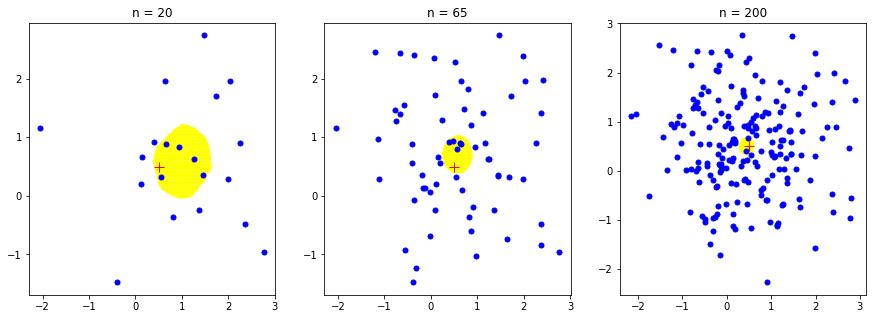

In [2]:
import matplotlib.pyplot as plt
ns = [20, 65, 200]
start_time = datetime.now()
plt.subplots(figsize=(15, 5))
Conf_sets = []
for k in range(3):
    np.random.seed(0)
    n = ns[k]
    X = np.random.normal(loc=0.0, scale=1.0, size=(n, 2)) + 0.5
    # spherical symmetry
    H = np.zeros((n, 2))
    H[:, 0] = np.sqrt(np.random.chisquare(df=2, size=n))
    # Null distribution of |W|
    Wns = np.zeros(10000)
    def my_func(x):
        return(x/np.sqrt(np.sum(x*x)))
    for j in range(10000):
        Unit_vec = np.apply_along_axis(my_func, 1, np.random.normal(size=(n,2)))
        Wj = sum((H[:,0][:,np.newaxis])*Unit_vec)
        Wns[j] = np.inner(Wj, Wj)
    Wns = Wns/n
    Wns = np.quantile(Wns,0.95)
    
    plt.subplot(1, 3, k+1)
    plt.plot(X[:,0], X[:,1], ".", markersize=10, alpha=0.01)
    
    Conf_set = []
    for x in np.arange(-1,2.5,0.01):
        for y in np.arange(-1,2.5,0.01):
            W = Wilcoxon_signed_rank(X - np.array([x,y]), H, Symmetry="Spherical")
            if np.inner(W, W) <= Wns:
                plt.plot(x, y, ".", markersize=0.4, color="yellow")
                Conf_set = Conf_set + [[x,y]]
    plt.plot(0.5, 0.5, "+", markersize=10, color="red")
    plt.title('n = ' + str(n))
    Conf_sets = Conf_sets + [Conf_set]
    plt.plot(X[:,0], X[:,1], ".", markersize=10, color="blue")
end_time = datetime.now()
print(end_time - start_time)

3:03:20.994437


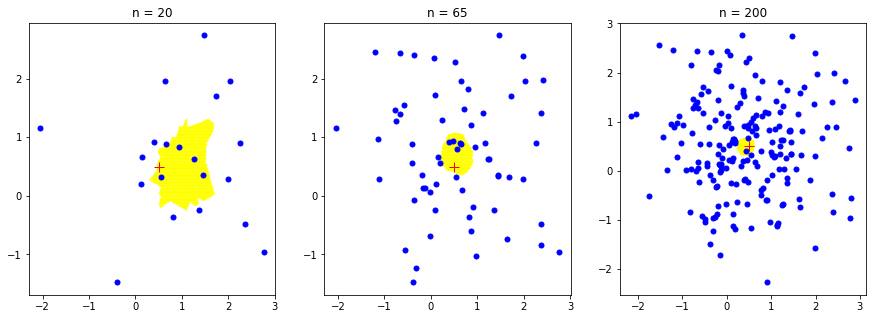

In [3]:
# central symmetry
import matplotlib.pyplot as plt
ns = [20, 65, 200]
start_time = datetime.now()
plt.subplots(figsize=(15, 5))
Conf_sets_c = []
for k in range(3):
    np.random.seed(0)
    n = ns[k]
    X = np.random.normal(loc=0.0, scale=1.0, size=(n, 2)) + 0.5
    # central symmetry
    H = np.random.normal(loc=0.0, scale=1.0, size=(n, 2))
    H[:, 0] = abs(H[:, 0])
    # Null distribution of Tn
    Tns = np.zeros(10000)
    for j in range(10000):
        Wj = sum(H * ((np.random.binomial(1, 0.5, n)*2 - 1)[:,np.newaxis]))
        Tns[j] = np.inner(Wj, Wj)
    Tns = Tns/n
    Tns = np.quantile(Tns,0.95)
    
    plt.subplot(1, 3, k+1)
    plt.plot(X[:,0], X[:,1], ".", markersize=10, alpha=0.01)
    
    Conf_set = []
    for x in np.arange(-1,2.5,0.01):
        for y in np.arange(-1,2.5,0.01):
            W = Wilcoxon_signed_rank(X - np.array([x,y]), H, Symmetry="Central")
            if np.inner(W, W) <= Tns:
                plt.plot(x, y, ".", markersize=0.4, color="yellow")
                Conf_set = Conf_set + [[x,y]]
    plt.plot(0.5, 0.5, "+", markersize=10, color="red")
    plt.title('n = ' + str(n))
    Conf_sets_c = Conf_sets_c + [Conf_set]
    plt.plot(X[:,0], X[:,1], ".", markersize=10, color="blue")
end_time = datetime.now()
print(end_time - start_time)

0:12:29.988196


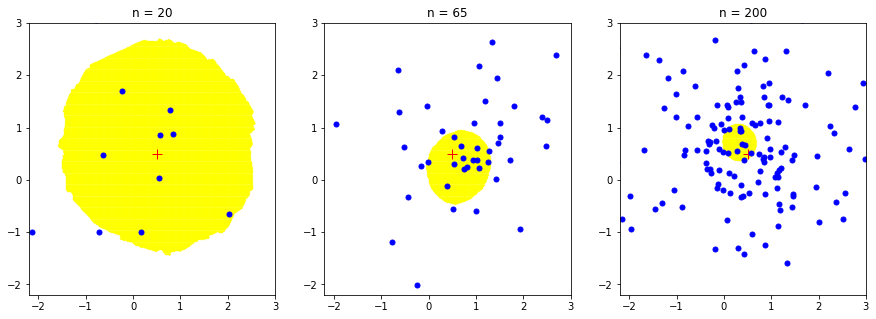

In [4]:
from scipy.stats import multivariate_t
ns = [20, 65, 200]
start_time = datetime.now()
plt.subplots(figsize=(15, 5))
Conf_sets_t = []
for k in range(3):
    np.random.seed(1)
    n = ns[k]
    X = multivariate_t.rvs(loc=[0.5, 0.5], shape=[[1.0, 0.0], [0.0, 1.0]], df=1, size=n)
    # spherical symmetry
    H = np.zeros((n, 2))
    H[:, 0] = np.sqrt(np.random.chisquare(df=2, size=n))
    # Null distribution of |W|
    Wns = np.zeros(10000)
    def my_func(x):
        return(x/np.sqrt(np.sum(x*x)))
    for j in range(10000):
        Unit_vec = np.apply_along_axis(my_func, 1, np.random.normal(size=(n,2)))
        Wj = sum((H[:,0][:,np.newaxis])*Unit_vec)
        Wns[j] = np.inner(Wj, Wj)
    Wns = Wns/n
    Wns = np.quantile(Wns,0.95)
    
    plt.subplot(1, 3, k+1)
    plt.xlim(-2.2, 3)
    plt.ylim(-2.2, 3)
    plt.plot(X[:,0], X[:,1], ".", markersize=10, alpha=0.01)
    
    Conf_set = []
    low = -1
    high = 2.5
    if k == 0:
        low = -2.5
        high = 3.1
    for x in np.arange(low,high,0.01):
        for y in np.arange(low,high,0.01):
            W = Wilcoxon_signed_rank(X - np.array([x,y]), H, Symmetry="Spherical")
            if np.inner(W, W) <= Wns:
                plt.plot(x, y, ".", markersize=0.4, color="yellow")
                Conf_set = Conf_set + [[x,y]]
    plt.plot(0.5, 0.5, "+", markersize=10, color="red")
    plt.title('n = ' + str(n))
    Conf_sets_t = Conf_sets_t + [Conf_set]
    plt.plot(X[:,0], X[:,1], ".", markersize=10, color="blue")
end_time = datetime.now()
print(end_time - start_time)

0:00:15.857930
0:00:08.931751
0:01:09.484327


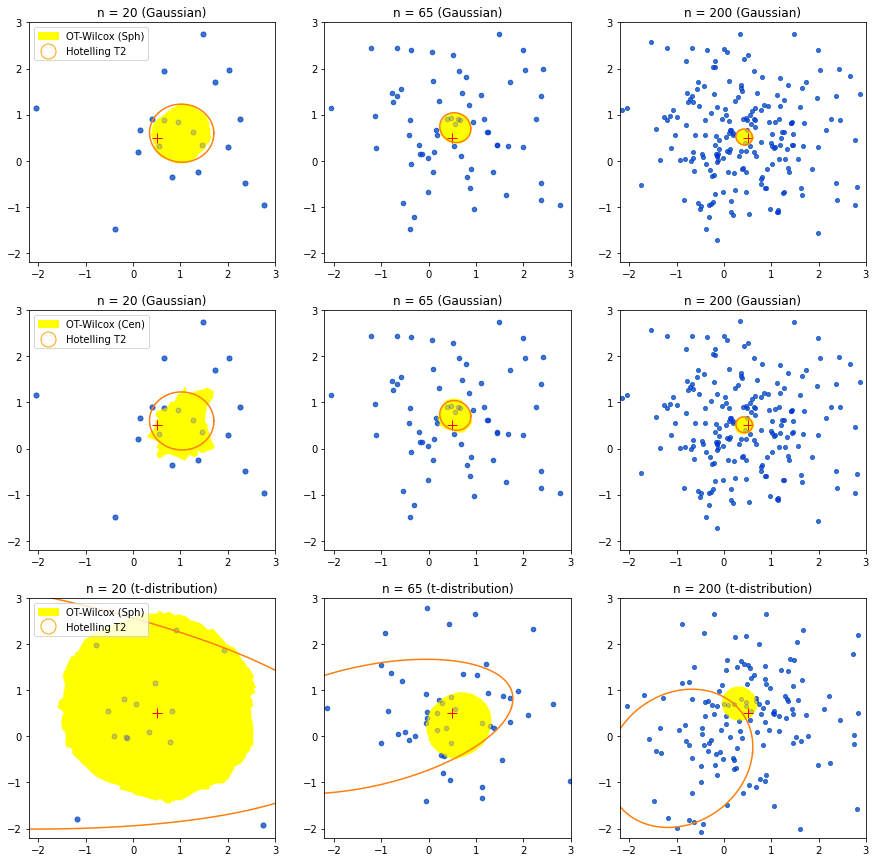

In [6]:
from scipy.stats import f
from scipy.linalg import sqrtm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

ns = [20, 65, 200]
start_time = datetime.now()
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for k in range(3):
    np.random.seed(0)
    n = ns[k]
    X = np.random.normal(loc=0.0, scale=1.0, size=(n, 2)) + 0.5
    # spherical symmetry
    H = np.zeros((n, 2))
    H[:, 0] = np.sqrt(np.random.chisquare(df=2, size=n))
    
    patchList = []
    patchList.append(mpatches.Patch(color="yellow", label="OT-Wilcox (Sph)"))
    orange_circle = mlines.Line2D([], [], color='orange', marker='o', linestyle='None',
                          markersize=15, label='Hotelling T2',fillstyle='none')
    patchList.append(orange_circle)
    axs[0, k].set_xlim(-2.2, 3)
    axs[0, k].set_ylim(-2.2, 3)
    axs[0, k].plot(X[:,0], X[:,1], ".", markersize=10-k, alpha=0.8)

    for x_y in Conf_sets[k]:
        axs[0, k].plot(x_y[0], x_y[1], "o", markersize=0.4, color="yellow",fillstyle='full',markerfacecolor='yellow',
         markeredgecolor='yellow')
    cent = np.mean(X,axis=0)
    Sigma_r = sqrtm(np.cov(X, rowvar=False))
    thetas = np.arange(0,np.pi*2,0.01)
    r = np.sqrt(f.ppf(0.95, 2, n-2)*2*(n-1)/(n-2)/n)
    T2_cont = np.zeros((len(thetas),2))
    for j in range(len(thetas)):
        T2_cont[j] = cent + np.matmul(np.array([r*np.cos(thetas[j]),r*np.sin(thetas[j])]),Sigma_r)
    axs[0, k].plot(0.5, 0.5, "+", markersize=10, color="red")
    axs[0, k].set_title('n = ' + str(n) + ' (Gaussian)')
    axs[0, k].plot(X[:,0], X[:,1], ".", markersize=10-k, color="blue", alpha=0.2)
    axs[0, k].plot(T2_cont[:,0], T2_cont[:,1])
    # plot the legend
    if k == 0:
        axs[0, k].legend(handles=patchList,loc='upper left')
end_time = datetime.now()
print(end_time - start_time)

start_time = datetime.now()
for k in range(3):
    np.random.seed(0)
    n = ns[k]
    X = np.random.normal(loc=0.0, scale=1.0, size=(n, 2)) + 0.5

    patchList = []
    patchList.append(mpatches.Patch(color="yellow", label="OT-Wilcox (Cen)"))
    orange_circle = mlines.Line2D([], [], color='orange', marker='o', linestyle='None',
                          markersize=15, label='Hotelling T2',fillstyle='none')
    patchList.append(orange_circle)
    axs[1, k].set_xlim(-2.2, 3)
    axs[1, k].set_ylim(-2.2, 3)
    axs[1, k].plot(X[:,0], X[:,1], ".", markersize=10-k, alpha=0.8)

    for x_y in Conf_sets_c[k]:
        axs[1, k].plot(x_y[0], x_y[1], "o", markersize=0.4, color="yellow",fillstyle='full',markerfacecolor='yellow',
         markeredgecolor='yellow')
    cent = np.mean(X,axis=0)
    Sigma_r = sqrtm(np.cov(X, rowvar=False))
    thetas = np.arange(0,np.pi*2,0.01)
    r = np.sqrt(f.ppf(0.95, 2, n-2)*2*(n-1)/(n-2)/n)
    T2_cont = np.zeros((len(thetas),2))
    for j in range(len(thetas)):
        T2_cont[j] = cent + np.matmul(np.array([r*np.cos(thetas[j]),r*np.sin(thetas[j])]),Sigma_r)
    axs[1, k].plot(0.5, 0.5, "+", markersize=10, color="red")
    axs[1, k].set_title('n = ' + str(n) + ' (Gaussian)')
    axs[1, k].plot(X[:,0], X[:,1], ".", markersize=10-k, color="blue", alpha=0.2)
    axs[1, k].plot(T2_cont[:,0], T2_cont[:,1])
    # plot the legend
    if k == 0:
        axs[1, k].legend(handles=patchList,loc='upper left')
end_time = datetime.now()
print(end_time - start_time)

ns = [20, 65, 200]
start_time = datetime.now()
for k in range(3):
    np.random.seed(0)
    n = ns[k]
    X = multivariate_t.rvs(loc=[0.5, 0.5], shape=[[1.0, 0.0], [0.0, 1.0]], df=1, size=n)
    
    patchList = []
    patchList.append(mpatches.Patch(color="yellow", label="OT-Wilcox (Sph)"))
    orange_circle = mlines.Line2D([], [], color='orange', marker='o', linestyle='None',
                          markersize=15, label='Hotelling T2',fillstyle='none')
    patchList.append(orange_circle)
    axs[2, k].set_xlim(-2.2, 3)
    axs[2, k].set_ylim(-2.2, 3)
    axs[2, k].plot(X[:,0], X[:,1], ".", markersize=10-k, alpha=0.8)

    for x_y in Conf_sets_t[k]:
        axs[2, k].plot(x_y[0], x_y[1], "o", markersize=0.4, color="yellow",fillstyle='full',markerfacecolor='yellow',
         markeredgecolor='yellow')
    cent = np.mean(X,axis=0)
    Sigma_r = sqrtm(np.cov(X, rowvar=False))
    thetas = np.arange(0,np.pi*2,0.01)
    r = np.sqrt(f.ppf(0.95, 2, n-2)*2*(n-1)/(n-2)/n)
    T2_cont = np.zeros((len(thetas),2))
    for j in range(len(thetas)):
        T2_cont[j] = cent + np.matmul(np.array([r*np.cos(thetas[j]),r*np.sin(thetas[j])]),Sigma_r)
    axs[2, k].plot(0.5, 0.5, "+", markersize=10, color="red")
    axs[2, k].set_title('n = ' + str(n) + ' (t-distribution)')
    axs[2, k].plot(X[:,0], X[:,1], ".", markersize=10-k, color="blue", alpha=0.2)
    axs[2, k].plot(T2_cont[:,0], T2_cont[:,1])
    # plot the legend
    if k == 0:
        axs[2, k].legend(handles=patchList,loc='upper left')
end_time = datetime.now()
print(end_time - start_time)

#plt.savefig("/Users/huangzhen/desktop/Conf_set.pdf")
plt.show()